In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
model = 'gpt2'
def open_pkl_result(metric, layer):
    with open(f'results/{model}_{metric}_{layer}.pkl', 'rb') as f:
        # data is a list with sentences: 
        # each sentence consists of (sentence, tokenized_text, impact matrix, tree2list, nltk_tree)
        data = pickle.load(f)
    
    return data

In [3]:
def plot_confusion_matrix(cm, swapped_vocab):
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    # ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=swapped_vocab.values(), yticklabels=swapped_vocab.values(),
           title='Confusion Matrix: relative shared levels',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(round(cm[i, j], 2)) if cm[i, j] != 0 else '0',
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('/Users/sperdijk/Documents/Master/Jaar_3/Thesis/thesis_code' + '/results/shared_levels/confusion_matrix.png')

In [9]:
def visualize_impact_matrix(sentence, imatrix, layer):
    fig, ax = plt.subplots()
    im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
    ax.figure.colorbar(im, ax=ax)

        # We want to show all ticks...
    ax.set(xticks=np.arange(imatrix.shape[1]),
           yticks=np.arange(imatrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=sentence, yticklabels=sentence,
           title='Impact matrix of sentence at layer ' + str(layer))
    
    ax.set_ylabel('Prediction of ...')
    ax.set_xlabel('Influence of ... on the prediction')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

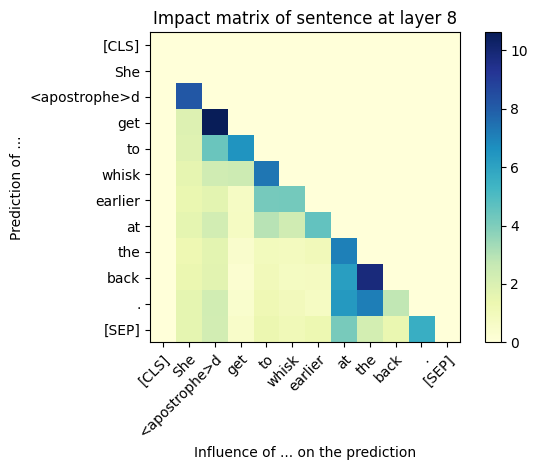

In [10]:
metric = 'dist'
layer = 8
data = open_pkl_result(metric, layer)[0]
sentence, imatrix = data[1], data[2]

visualize_impact_matrix(sentence, imatrix, layer)

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_layer_matrices(sentence, matrices):
    # Set up a 2x4 grid for the heatmaps
    fig, axs = plt.subplots(2, 4, figsize=(22, 10))
    
    # Ensure axs is a 2D array for easy indexing, even if there's only one row/column
    axs = axs.reshape(2, 4)
    
    for idx, ax in enumerate(axs.flat):
        # Get the current matrix
        imatrix = matrices[idx]
        
        # Create heatmap
        im = ax.imshow(imatrix, interpolation='nearest', cmap='YlGnBu')
        
        # Set tick marks and labels
        ax.set(xticks=np.arange(imatrix.shape[1]),
               yticks=np.arange(imatrix.shape[0]),
               xticklabels=sentence, yticklabels=sentence)
        
        # Rotate the tick labels for better layout
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Optional: Set a title for each subplot to differentiate, e.g., by layer number
        ax.set_title(f'Layer {idx+1}')
    
    fig.supxlabel('Influence of ... on the prediction', fontsize=14)
    fig.supylabel('Prediction of ...', fontsize=14)

    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Add a colorbar to the right of the grid. This adds a colorbar for the last plot,
    # but you might want to adjust or add a common colorbar for all.
    fig.colorbar(im, ax=axs, orientation='vertical', fraction=.1)

In [34]:
metric = 'dist'
all_matrices = []
for i in range(1, 9):
    data = open_pkl_result(metric, i)[0]
    sentence, imatrix = data[1], data[2]
    all_matrices.append(imatrix)

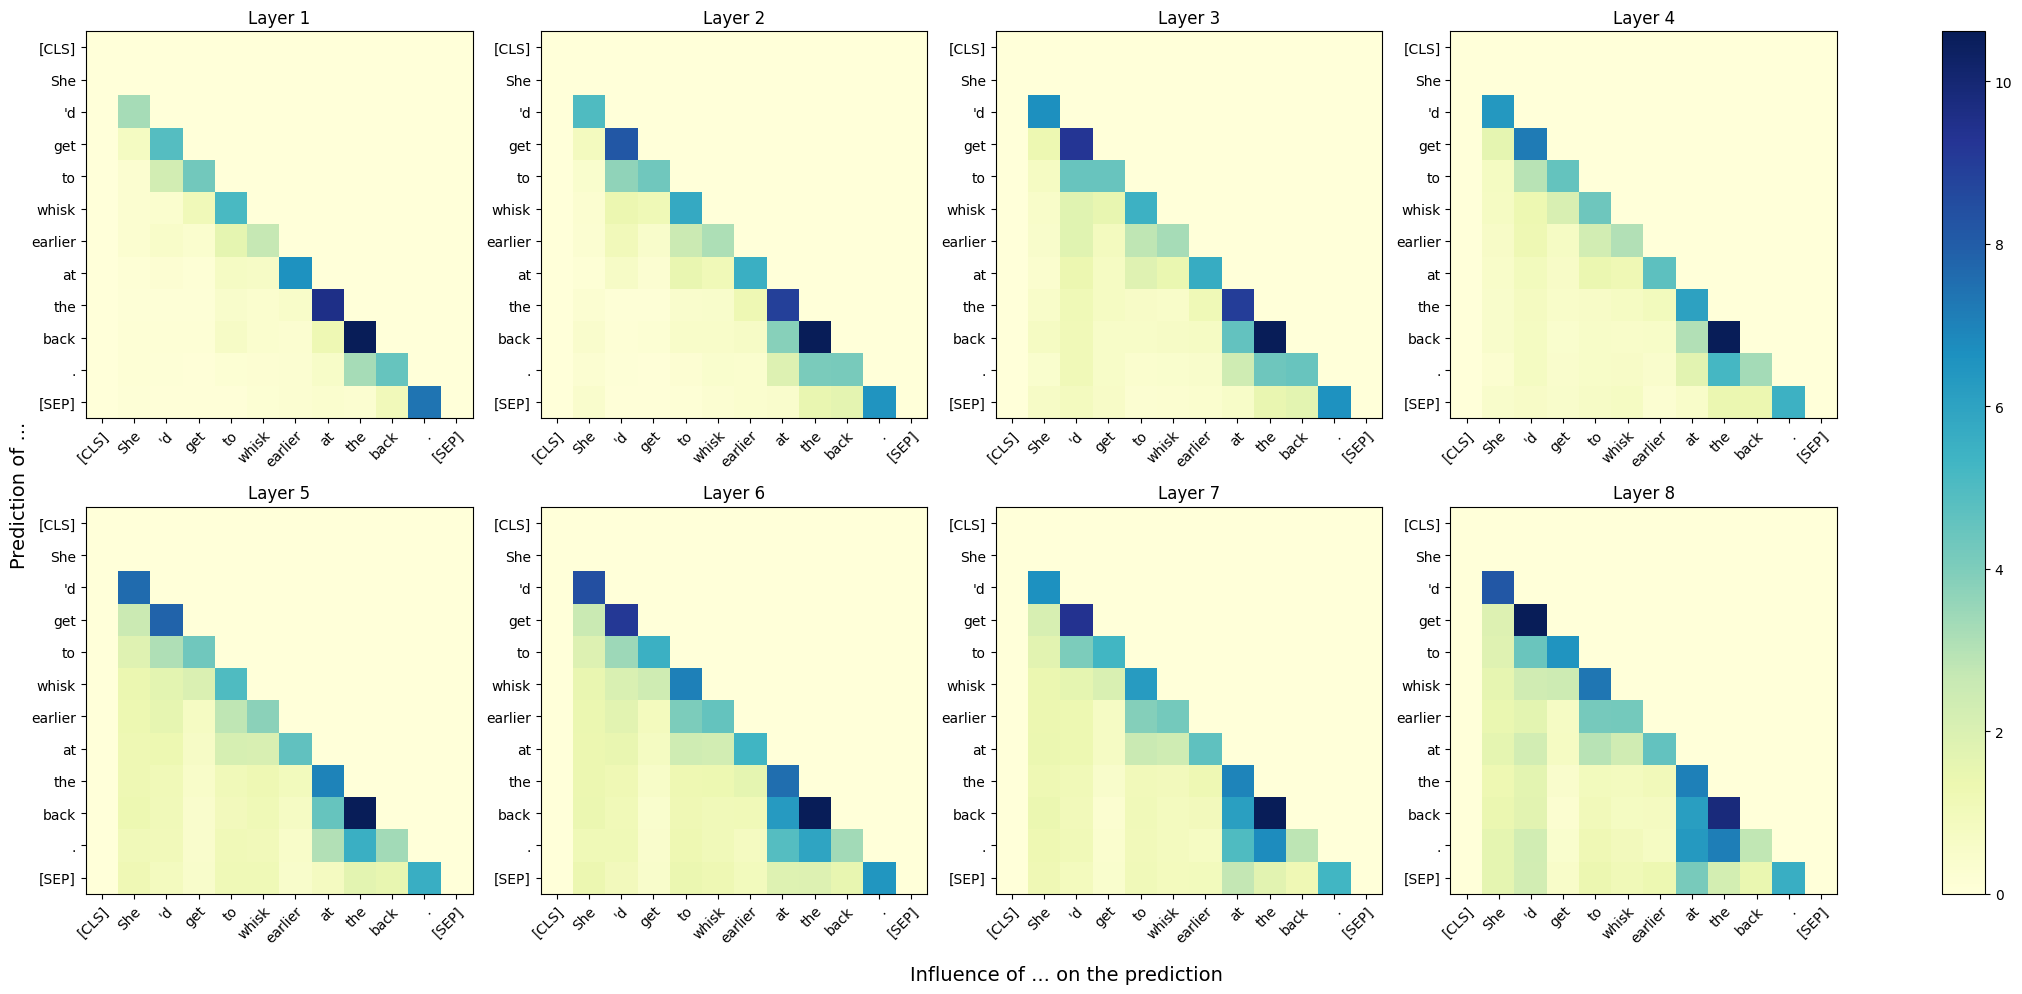

In [35]:
sentence[2] = "'d"
visualize_all_layer_matrices(sentence, all_matrices)